In [1]:
import torch
import os

print(os.getcwd())
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/home/sumit/eva7/assignment12/assignment9


In [2]:
!git clone https://github.com/sumitsarkar1/sumitEVA7.git

fatal: destination path 'sumitEVA7' already exists and is not an empty directory.


In [3]:
import main

net = main.getModel()
net = net.to(device)

In [4]:
SEED = 1

use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [5]:
!pip install torchsummary

from torchsummary import summary
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
net = net.to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]           1,184
         MaxPool2d-2            [-1, 8, 13, 13]               0
              ReLU-3            [-1, 8, 13, 13]               0
            Conv2d-4             [-1, 10, 9, 9]           2,010
         MaxPool2d-5             [-1, 10, 4, 4]               0
              ReLU-6             [-1, 10, 4, 4]               0
            Linear-7                   [-1, 32]           5,152
              ReLU-8                   [-1, 32]               0
            Linear-9                    [-1, 6]             198
           Conv2d-10           [-1, 10, 28, 28]             760
           Conv2d-11           [-1, 20, 10, 10]           5,020
           Linear-12                   [-1, 50]          25,050
           Linear-13                   [-1, 10]             510
Total params: 39,884
Trainable params: 

/home/sumit/anaconda3/envs/resnet/lib/python3.8/site-packages/torch/nn/functional.py:4065: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/sumit/anaconda3/envs/resnet/lib/python3.8/site-packages/torch/nn/functional.py:4003: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [7]:
import torch.optim as optim

from main import args
myargs = args()
myargs.batch_size = 256
epochs = 50
lr = 0.007

trainloader = main.getTrainLoader(myargs)
testloader = main.getTestLoader(myargs)

max_lr = 0.007
pct_start = 0.3 #5/24
div_factor = 25
steps_per_epoch = len(trainloader)
final_div_factor = 1e4 # NO ANNIHILATION

optimizer = main.setOptimizer(net, lr)
scheduler = main.setScheduler(optimizer, epochs, max_lr, steps_per_epoch, pct_start, div_factor, final_div_factor)

torch.cuda.empty_cache()

for epoch in range(epochs):
    print("EPOCH:", epoch+1)
    main.train(net, scheduler, optimizer, trainloader, device)
    main.test(net, testloader, device)

Files already downloaded and verified
Files already downloaded and verified
EPOCH: 1


Loss=2.2555489540100098 Batch_id=195 Train Accuracy=15.98: 100%|█| 196/196 



Test set: Average loss: 0.0089, Accuracy: 2129/10000 (21.29%)

EPOCH: 2


Loss=2.064182758331299 Batch_id=195 Train Accuracy=22.92: 100%|█| 196/196 [



Test set: Average loss: 0.0081, Accuracy: 2740/10000 (27.40%)

EPOCH: 3


Loss=2.0448455810546875 Batch_id=195 Train Accuracy=28.74: 100%|█| 196/196 



Test set: Average loss: 0.0073, Accuracy: 3388/10000 (33.88%)

EPOCH: 4


Loss=1.6461302042007446 Batch_id=195 Train Accuracy=34.24: 100%|█| 196/196 



Test set: Average loss: 0.0066, Accuracy: 4008/10000 (40.08%)

EPOCH: 5


Loss=1.60686457157135 Batch_id=195 Train Accuracy=38.54: 100%|█| 196/196 [0



Test set: Average loss: 0.0062, Accuracy: 4495/10000 (44.95%)

EPOCH: 6


Loss=1.6963411569595337 Batch_id=195 Train Accuracy=42.14: 100%|█| 196/196 



Test set: Average loss: 0.0059, Accuracy: 4700/10000 (47.00%)

EPOCH: 7


Loss=1.6637786626815796 Batch_id=195 Train Accuracy=45.03: 100%|█| 196/196 



Test set: Average loss: 0.0057, Accuracy: 4955/10000 (49.55%)

EPOCH: 8


Loss=1.5732030868530273 Batch_id=195 Train Accuracy=46.79: 100%|█| 196/196 



Test set: Average loss: 0.0057, Accuracy: 4999/10000 (49.99%)

EPOCH: 9


Loss=1.722937822341919 Batch_id=195 Train Accuracy=48.26: 100%|█| 196/196 [



Test set: Average loss: 0.0053, Accuracy: 5263/10000 (52.63%)

EPOCH: 10


Loss=1.2323740720748901 Batch_id=195 Train Accuracy=50.06: 100%|█| 196/196 



Test set: Average loss: 0.0053, Accuracy: 5230/10000 (52.30%)

EPOCH: 11


Loss=1.2514287233352661 Batch_id=195 Train Accuracy=51.40: 100%|█| 196/196 



Test set: Average loss: 0.0051, Accuracy: 5505/10000 (55.05%)

EPOCH: 12


Loss=1.3584550619125366 Batch_id=195 Train Accuracy=52.91: 100%|█| 196/196 



Test set: Average loss: 0.0050, Accuracy: 5576/10000 (55.76%)

EPOCH: 13


Loss=1.4875551462173462 Batch_id=195 Train Accuracy=53.94: 100%|█| 196/196 



Test set: Average loss: 0.0048, Accuracy: 5806/10000 (58.06%)

EPOCH: 14


Loss=1.251463770866394 Batch_id=195 Train Accuracy=54.97: 100%|█| 196/196 [



Test set: Average loss: 0.0047, Accuracy: 5760/10000 (57.60%)

EPOCH: 15


Loss=1.1466310024261475 Batch_id=195 Train Accuracy=56.37: 100%|█| 196/196 



Test set: Average loss: 0.0045, Accuracy: 6008/10000 (60.08%)

EPOCH: 16


Loss=1.0661637783050537 Batch_id=195 Train Accuracy=57.04: 100%|█| 196/196 



Test set: Average loss: 0.0049, Accuracy: 5790/10000 (57.90%)

EPOCH: 17


Loss=1.1673144102096558 Batch_id=195 Train Accuracy=57.61: 100%|█| 196/196 



Test set: Average loss: 0.0044, Accuracy: 6172/10000 (61.72%)

EPOCH: 18


Loss=1.2398110628128052 Batch_id=195 Train Accuracy=58.45: 100%|█| 196/196 



Test set: Average loss: 0.0043, Accuracy: 6297/10000 (62.97%)

EPOCH: 19


Loss=1.1592289209365845 Batch_id=195 Train Accuracy=58.85: 100%|█| 196/196 



Test set: Average loss: 0.0042, Accuracy: 6294/10000 (62.94%)

EPOCH: 20


Loss=1.2074267864227295 Batch_id=195 Train Accuracy=59.77: 100%|█| 196/196 



Test set: Average loss: 0.0041, Accuracy: 6353/10000 (63.53%)

EPOCH: 21


Loss=1.0309003591537476 Batch_id=195 Train Accuracy=60.38: 100%|█| 196/196 



Test set: Average loss: 0.0040, Accuracy: 6400/10000 (64.00%)

EPOCH: 22


Loss=1.0492115020751953 Batch_id=195 Train Accuracy=60.57: 100%|█| 196/196 



Test set: Average loss: 0.0041, Accuracy: 6345/10000 (63.45%)

EPOCH: 23


Loss=1.2418771982192993 Batch_id=195 Train Accuracy=60.86: 100%|█| 196/196 



Test set: Average loss: 0.0042, Accuracy: 6237/10000 (62.37%)

EPOCH: 24


Loss=0.9546443223953247 Batch_id=195 Train Accuracy=61.54: 100%|█| 196/196 



Test set: Average loss: 0.0040, Accuracy: 6499/10000 (64.99%)

EPOCH: 25


Loss=1.0255001783370972 Batch_id=195 Train Accuracy=62.14: 100%|█| 196/196 



Test set: Average loss: 0.0039, Accuracy: 6580/10000 (65.80%)

EPOCH: 26


Loss=0.8354696035385132 Batch_id=195 Train Accuracy=62.84: 100%|█| 196/196 



Test set: Average loss: 0.0038, Accuracy: 6700/10000 (67.00%)

EPOCH: 27


Loss=1.217976450920105 Batch_id=195 Train Accuracy=62.91: 100%|█| 196/196 [



Test set: Average loss: 0.0039, Accuracy: 6560/10000 (65.60%)

EPOCH: 28


Loss=1.0528804063796997 Batch_id=195 Train Accuracy=62.79: 100%|█| 196/196 



Test set: Average loss: 0.0038, Accuracy: 6631/10000 (66.31%)

EPOCH: 29


Loss=1.1999266147613525 Batch_id=195 Train Accuracy=63.95: 100%|█| 196/196 



Test set: Average loss: 0.0038, Accuracy: 6674/10000 (66.74%)

EPOCH: 30


Loss=0.9048099517822266 Batch_id=195 Train Accuracy=63.99: 100%|█| 196/196 



Test set: Average loss: 0.0036, Accuracy: 6733/10000 (67.33%)

EPOCH: 31


Loss=1.285278558731079 Batch_id=195 Train Accuracy=64.67: 100%|█| 196/196 [



Test set: Average loss: 0.0037, Accuracy: 6782/10000 (67.82%)

EPOCH: 32


Loss=0.9498744010925293 Batch_id=195 Train Accuracy=64.38: 100%|█| 196/196 



Test set: Average loss: 0.0037, Accuracy: 6761/10000 (67.61%)

EPOCH: 33


Loss=1.0059425830841064 Batch_id=195 Train Accuracy=65.00: 100%|█| 196/196 



Test set: Average loss: 0.0037, Accuracy: 6814/10000 (68.14%)

EPOCH: 34


Loss=0.9011070132255554 Batch_id=195 Train Accuracy=65.36: 100%|█| 196/196 



Test set: Average loss: 0.0037, Accuracy: 6778/10000 (67.78%)

EPOCH: 35


Loss=0.9754853248596191 Batch_id=195 Train Accuracy=65.46: 100%|█| 196/196 



Test set: Average loss: 0.0037, Accuracy: 6794/10000 (67.94%)

EPOCH: 36


Loss=0.8660950660705566 Batch_id=195 Train Accuracy=65.78: 100%|█| 196/196 



Test set: Average loss: 0.0035, Accuracy: 6937/10000 (69.37%)

EPOCH: 37


Loss=0.8642746210098267 Batch_id=195 Train Accuracy=66.58: 100%|█| 196/196 



Test set: Average loss: 0.0036, Accuracy: 6778/10000 (67.78%)

EPOCH: 38


Loss=0.6785097718238831 Batch_id=195 Train Accuracy=66.69: 100%|█| 196/196 



Test set: Average loss: 0.0036, Accuracy: 6873/10000 (68.73%)

EPOCH: 39


Loss=1.0457367897033691 Batch_id=195 Train Accuracy=66.87: 100%|█| 196/196 



Test set: Average loss: 0.0036, Accuracy: 6869/10000 (68.69%)

EPOCH: 40


Loss=0.6855357885360718 Batch_id=195 Train Accuracy=67.06: 100%|█| 196/196 



Test set: Average loss: 0.0035, Accuracy: 6960/10000 (69.60%)

EPOCH: 41


Loss=1.0884711742401123 Batch_id=195 Train Accuracy=67.44: 100%|█| 196/196 



Test set: Average loss: 0.0034, Accuracy: 7012/10000 (70.12%)

EPOCH: 42


Loss=0.9566692113876343 Batch_id=195 Train Accuracy=67.61: 100%|█| 196/196 



Test set: Average loss: 0.0034, Accuracy: 6973/10000 (69.73%)

EPOCH: 43


Loss=0.8463560342788696 Batch_id=195 Train Accuracy=68.02: 100%|█| 196/196 



Test set: Average loss: 0.0034, Accuracy: 7082/10000 (70.82%)

EPOCH: 44


Loss=1.0386035442352295 Batch_id=195 Train Accuracy=68.37: 100%|█| 196/196 



Test set: Average loss: 0.0033, Accuracy: 7074/10000 (70.74%)

EPOCH: 45


Loss=0.7766836285591125 Batch_id=195 Train Accuracy=68.72: 100%|█| 196/196 



Test set: Average loss: 0.0034, Accuracy: 7067/10000 (70.67%)

EPOCH: 46


Loss=0.7626378536224365 Batch_id=195 Train Accuracy=68.86: 100%|█| 196/196 



Test set: Average loss: 0.0033, Accuracy: 7128/10000 (71.28%)

EPOCH: 47


Loss=0.9091261029243469 Batch_id=195 Train Accuracy=69.62: 100%|█| 196/196 



Test set: Average loss: 0.0033, Accuracy: 7137/10000 (71.37%)

EPOCH: 48


Loss=0.9550954699516296 Batch_id=195 Train Accuracy=69.38: 100%|█| 196/196 



Test set: Average loss: 0.0032, Accuracy: 7160/10000 (71.60%)

EPOCH: 49


Loss=0.769117534160614 Batch_id=195 Train Accuracy=69.60: 100%|█| 196/196 [



Test set: Average loss: 0.0033, Accuracy: 7148/10000 (71.48%)

EPOCH: 50


Loss=0.914076030254364 Batch_id=195 Train Accuracy=69.53: 100%|█| 196/196 [



Test set: Average loss: 0.0033, Accuracy: 7142/10000 (71.42%)



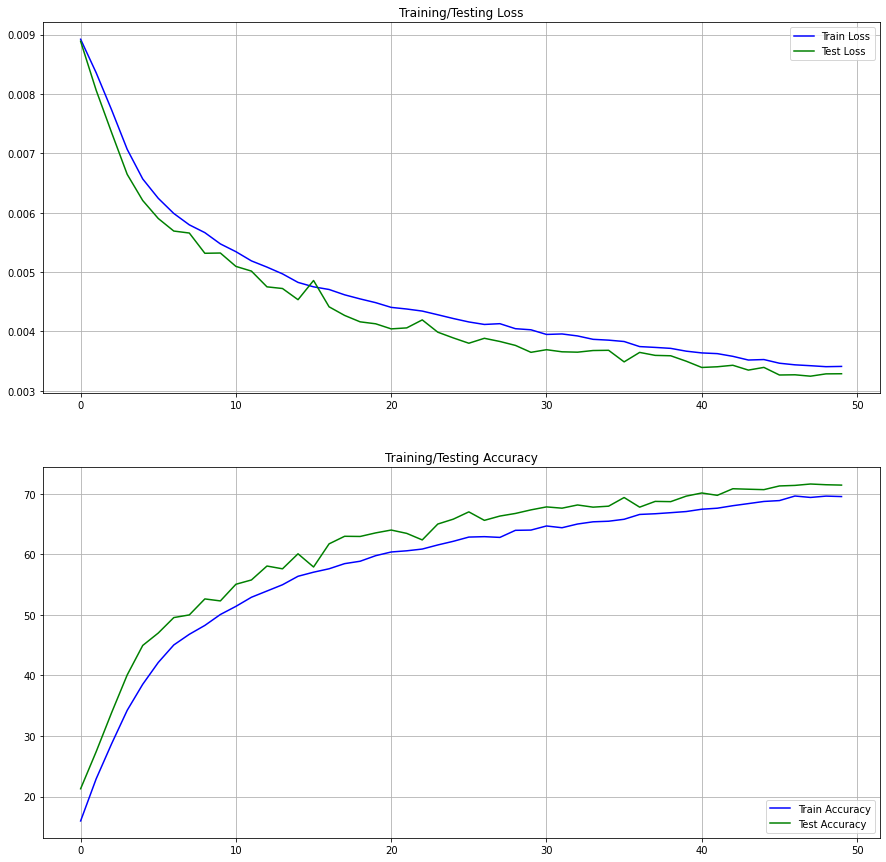

In [8]:
import matplotlib.pyplot as plt

train_losses = main.getTrainLoss()
test_losses = main.getTestLoss()
    
train_acc = main.getTrainAcc()
test_acc = main.getTestAcc()

   
fig, axs = plt.subplots(2,1,figsize=(15,15))
axs[0].plot(train_losses, color='b', label='Train Loss')
axs[0].plot(test_losses, color='g', label='Test Loss')
axs[0].grid()
axs[1].plot(train_acc, color='b', label='Train Accuracy')
axs[1].plot(test_acc, color='g', label='Test Accuracy')
axs[1].grid()
axs[0].legend(loc="upper right")
axs[1].legend(loc="lower right")
axs[0].set_title("Training/Testing Loss")
axs[1].set_title("Training/Testing Accuracy")

plt.savefig('plot_withoutdropout.jpg', bbox_inches='tight')